# Solution 2

##                                                           Tamir Cohen

### Q1

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import time

#### a

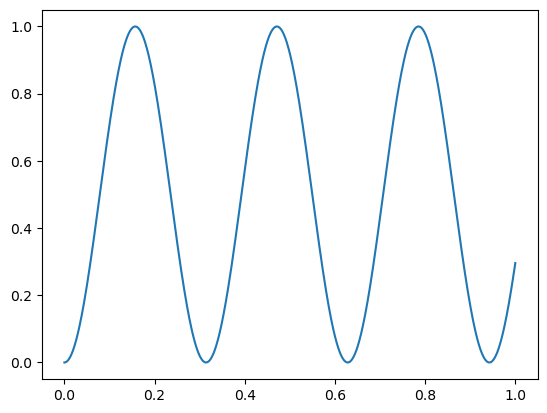

In [106]:

def f(vec):
    return (np.sin(np.sqrt(100)*vec))**2

vec = np.linspace(0,1,1001)
plt.plot(vec,f(vec))
plt.show()

#### b

In [107]:
def I_func(dx):
    I = 0
    vec = np.arange(0,1,dx)
    N = len(vec)-1
    
    for n in range(N):
        I += dx/2.0 * (f(vec[n]) + f(vec[n+1]))
    return I
    
def eps(Ii,Iii):
    return np.abs((1/3.0 * (Ii-Iii)))

start_time = time.perf_counter()

dx = vec[-1] - vec[0]
I = 0
eps_val = np.inf
Iii = I_func(dx)
while eps_val>1e-6:
    dx = dx/2 
    Ii = I_func(dx)
    eps_val = eps(Ii,Iii)
    Iii = Ii
    
end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{Iii:.6f}")
print(f"dx is :{dx:.4e}")

epsilon 7.524e-07 
The operation completed in 1.4423 seconds
Area is :0.477174
dx is :7.6294e-06


In [108]:
def I1_f(dx):
    return dx/2.0 * (f(0) + f(dx))

def Ii_f(dx,I_prev):
    N = len(np.arange(0,1,dx)) - 1
    I  = 0.5 * I_prev
    for i in np.arange(0,N,2):
        I += dx*np.sum(f(0+i*dx))
    return I

def eps_fun(I,I_prev):
    return np.abs((1/3.0 * (I-I_prev)))

dx = 1
I1 = I1_f(1)
dx = dx/2

I2 = Ii_f(dx,I1)
I_prev = I2
eps_val = eps_fun(I2,I1)
start_time = time.perf_counter()
while eps_val>1e-6:
    dx = dx/2 
    I  = Ii_f(dx,I_prev)
    eps_val = eps_fun(I,I_prev)
    I_prev = I


end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{Iii:.6f}")
print(f"dx is :{dx:.4e}")


epsilon 8.293e-07 
The operation completed in 9.8601 seconds
Area is :0.477174
dx is :9.5367e-07


#### c

In [109]:
def R11_f(dx):
    return dx/2.0 * (f(0) + f(dx))

def Ri1_f(dx,Rim1i):
    N = len(np.arange(0,1,dx)) - 1
    I  = 0.5 * Rim1i
    for i in np.arange(0,N,2):
        I += dx*np.sum(f(0+i*dx))
    return I


def R_imp1_f (Rim,Rim1m,m):
    return Rim + 1/(4**m - 1) * (Rim-Rim1m)

def eps_fun (Rii,Rim1m,I):
    return np.abs(1/(4**I-1)*(Rii-Rim1m))


I=1
dx = 1
R11 = R11_f(dx)
dx = dx/2

I+=1
R21 = Ri1_f(dx,R11)
R22 = R_imp1_f(R21,R11,3)
eps_val = eps_fun(R22,R11,I)

R_prev = [R21,R22]

R = list()
start_time = time.perf_counter()
while eps_val>1e-6:
    I+=1
    dx=dx/2
    R = [Ri1_f(dx,R_prev[-1])]
    for m in range(I-1):
        R.append(R_imp1_f(R[-1],R_prev[m],m+1))
    eps_val = eps_fun(R[-1],R_prev[-1],I)
    R_prev = R
    


end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{R[-1]:.6f}")
print(f"dx is :{dx:.4e}")


epsilon 7.475e-07 
The operation completed in 0.0009 seconds
Area is :0.476309
dx is :1.5625e-02


### Q2